In [13]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy  
%load_ext autoreload
%autoreload 2

# Import model
from solve_consumption_saving import *
from Model import ReferenceDependenceClass

model_euler = ReferenceDependenceClass()
model_VFI = deepcopy(model_euler)

# Set one model to use EGM and one to use VFI
model_euler.par.euler = True
model_VFI.par.euler = False

# Set both models to consumption saving
model_euler.par.model = 'ConSav'
model_VFI.par.model = 'ConSav'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **EGM and VFI Comparison** #

Solve value of employment with EGM and VFI

In [14]:
# Using EGM
value_function_employment_ConSav(model_euler.par, model_euler.sol)

In [15]:
# Using VFI
value_function_employment_ConSav(model_VFI.par, model_VFI.sol)

Inspect policy functions

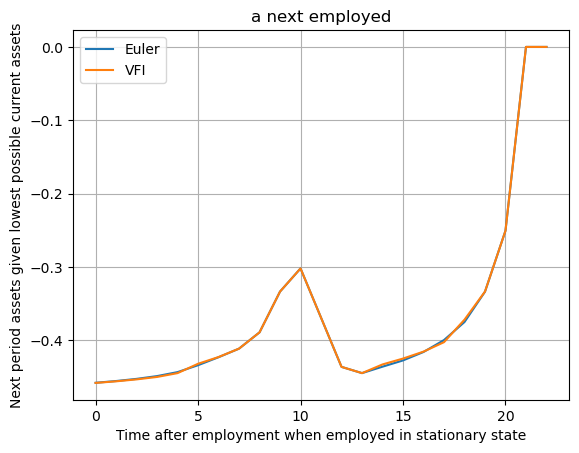

In [16]:
plt.plot(model_euler.sol.a_next_e[-1,:,0], label='Euler')
plt.plot(model_VFI.sol.a_next_e[-1,:,0], label='VFI')
plt.ylabel('Next period assets given lowest possible current assets')
plt.xlabel('Time after employment when employed in stationary state')
plt.title('a next employed')
plt.legend()
plt.grid(True)
plt.show()

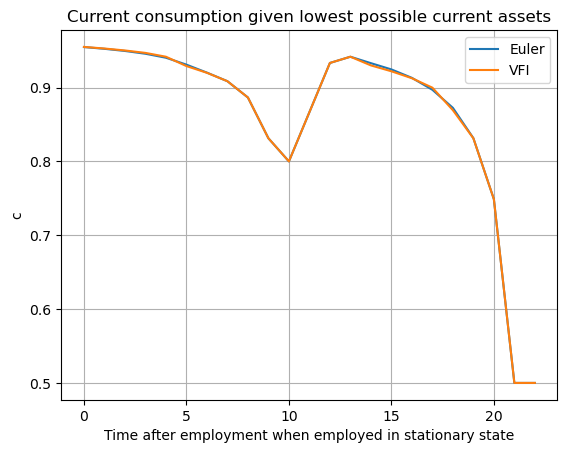

In [17]:
plt.plot(model_euler.sol.c_e[-1,:,0], label='Euler')
plt.plot(model_VFI.sol.c_e[-1,:,0], label='VFI')
plt.ylabel('c')
plt.title('Current consumption given lowest possible current assets')
plt.xlabel('Time after employment when employed in stationary state')
plt.legend()
plt.grid(True)
plt.show()

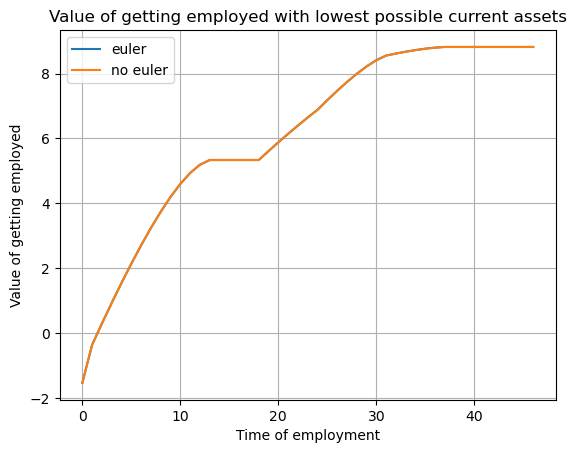

In [18]:
plt.plot(model_euler.par.V_e[:, 0, 0], label='euler')
plt.plot(model_VFI.par.V_e[:, 0, 0], label='no euler')
plt.title('Value of getting employed with lowest possible current assets')
plt.ylabel('Value of getting employed')
plt.xlabel('Time of employment')
plt.legend()
plt.grid(True)


Solve entire model to get search behaviour

In [19]:
model_euler.solve_ConSav()

array([0.27052806, 0.29024787, 0.28842126, 0.26905508, 0.25039419,
       0.23296983, 0.21730203, 0.20387615, 0.19315655, 0.18562504,
       0.18186643, 0.18271876, 0.18953282, 0.20467154, 0.22571599,
       0.25671793, 0.30681434, 0.36777006, 0.39678236, 0.38965536,
       0.38559393, 0.38665252, 0.39654591, 0.42314659, 0.40313709,
       0.38304231, 0.36348535, 0.34523292, 0.32918749, 0.31631201,
       0.30748584, 0.30300605, 0.29892829, 0.29538515, 0.29253261])

In [20]:
model_VFI.solve_ConSav()

array([0.27052625, 0.29024573, 0.28841873, 0.2690526 , 0.25039181,
       0.23296755, 0.21729988, 0.20387414, 0.19315468, 0.1856233 ,
       0.18186481, 0.18271725, 0.18953138, 0.20467013, 0.2257146 ,
       0.25671653, 0.30681286, 0.36776808, 0.3967803 , 0.38965333,
       0.38559193, 0.38665054, 0.39654386, 0.4231443 , 0.40313479,
       0.38304001, 0.36348307, 0.34523068, 0.32918529, 0.31630986,
       0.30748372, 0.30300394, 0.29892619, 0.29538306, 0.29253054])

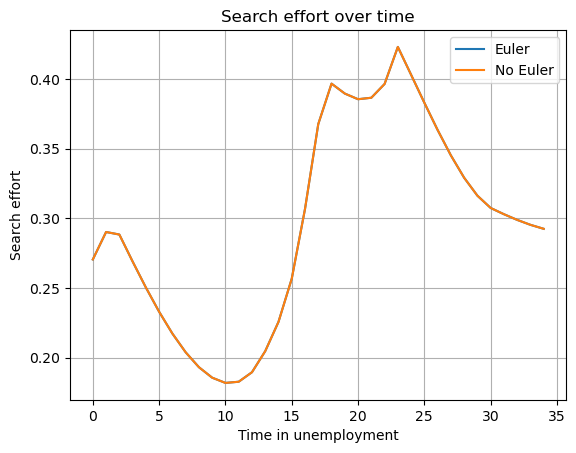

In [21]:
sim_euler = model_euler.sim.s_total
sim_VFI = model_VFI.sim.s_total

plt.plot(sim_euler, label='Euler')
plt.plot(sim_VFI, label = 'No Euler')
plt.title('Search effort over time')
plt.ylabel('Search effort')
plt.xlabel('Time in unemployment')
plt.legend()
plt.grid(True)
plt.show()

Simulate consumption and savings path after employment to see how debt is paid off

In [22]:
solve_forward_employment_ConSav(0, model_euler.par, model_euler.sol, model_euler.sim)
solve_forward_employment_ConSav(0, model_VFI.par, model_VFI.sol, model_VFI.sim)

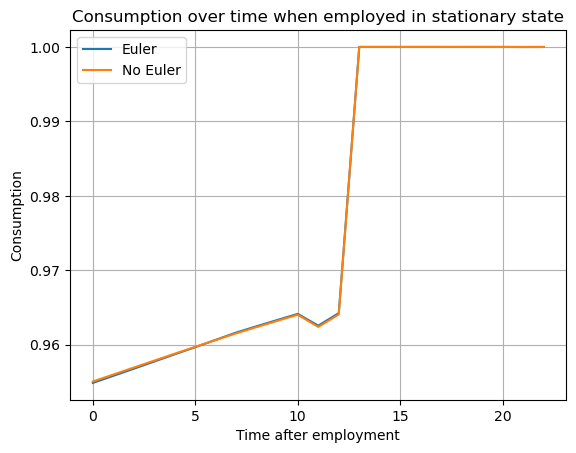

In [23]:
plt.plot(model_euler.sim.c_e[-1,:], label='Euler')
plt.plot(model_VFI.sim.c_e[-1,:], label='No Euler')
plt.title('Consumption over time when employed in stationary state')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Time after employment')
plt.grid(True)

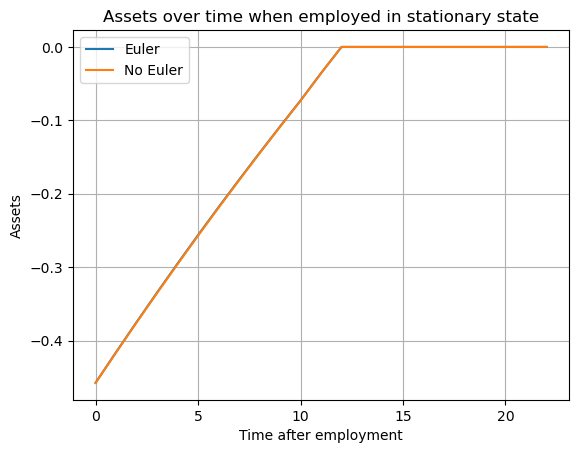

In [24]:
plt.plot(model_euler.sim.a_e[-1,:], label='Euler')
plt.plot(model_VFI.sim.a_e[-1,:], label='No Euler')
plt.title('Assets over time when employed in stationary state')
plt.ylabel('Assets')
plt.xlabel('Time after employment')
plt.legend()
plt.grid(True)